# 1. Loading Data: `load_blender_data`

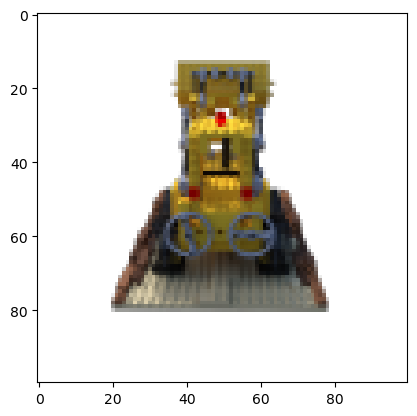

images shape:  (106, 100, 100, 4)
poses shape:  (106, 4, 4)
render_poses shape:  torch.Size([40, 4, 4])
hwf:  [100, 100, 138.88887889922103]


In [1]:
# Load data
from dataloader.load_blender import load_blender_data
from matplotlib import pyplot as plt

datadir = 'data/nerf_synthetic/lego'

images, poses, render_poses, hwf, i_split = load_blender_data(datadir, testskip=50, res_fac=8)
plt.imshow(images[0])
plt.show()

print('images shape: ', images.shape)
print('poses shape: ', poses.shape)
print('render_poses shape: ', render_poses.shape)
print('hwf: ', hwf)

# 2. Creating NeRF model: `create_nerf`

In [24]:
import torch

# Dependencies for 2.1
from utils import Embedder, get_embedder

# Dependencies for 2.2
from utils import NeRF

# Dependencies for 2.3
from utils import get_rays

## 2.1 Creating Positional Embedding Function: `Embedder` and `get_embedder`

In [16]:
inputs = torch.randn(10, 3)
emfn, ch = get_embedder(4)
outputs = emfn(inputs)
print(outputs.shape)

torch.Size([10, 27])


## 2.2 Initialize NeRF model: `NeRF`

In [23]:
model = NeRF(D=4, W=64,
             input_ch=ch, output_ch=4, skips=[4],
             input_ch_views=0, use_viewdirs=False)

model(outputs).shape

torch.Size([10, 4])

## 2.3 Generate rays: `get_rays`

In [29]:
K = torch.tensor([[1,0,0], [0,1,0], [0,0,1]])
c2w = torch.randn(3,3)
rays = get_rays(800, 800, K, c2w)
print(rays[0].shape)

torch.Size([800, 800, 3])
